### SVM Kernels

In [2]:
import sklearn
from sklearn import svm

In [4]:
dir(svm)

['LinearSVC',
 'LinearSVR',
 'NuSVC',
 'NuSVR',
 'OneClassSVM',
 'SVC',
 'SVR',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bounds',
 '_classes',
 '_liblinear',
 '_libsvm',
 '_libsvm_sparse',
 'l1_min_c']

A Support Vector Machine (SVM) kernel is a function used in SVM to transform the input data into a higher-dimensional space where it becomes easier to find a linear separation between different classes. This transformation allows SVM to handle non-linear relationships in the data.

Here are some common types of SVM kernels:

- **Linear Kernel**: It is the simplest kernel and works well when the data is linearly separable. The function is simply the dot product of two vectors.

- **Polynomial Kernel**: It represents the similarity of vectors in a feature space over polynomials of the original variables, allowing the classifier to learn non-linear boundaries.

- **Radial Basis Function (RBF) Kernel**: Also known as the Gaussian kernel, it is very effective in high-dimensional spaces. It maps the data points into an infinite-dimensional space using the Gaussian function.

- **Sigmoid Kernel**: It behaves like a two-layer neural network and is often used in neural network applications

In [5]:
svm_model = svm.SVC(kernel='linear',)

### How does Linear kernel work?

Ref: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf?msockid=32f48c5b92836ba53e7b9931932e6a5e

1. Represent Data points as Vectors : 
- Each data point in the training set is represented as a vector in an 𝑛-dimensional space, where 𝑛  is the number of features. For example, in a 2D space, each point is represented as (𝑥1,𝑥2).

2. Formulate the problem:
- The SVM aims to find the optimal hyperplane that separates the data points into two classes. The hyperplane can be expressed as:

      𝑤⋅𝑥+𝑏=0

Where:

𝑤 is the weight vector (coefficients).
𝑥 is the feature vector.
𝑏 is the bias term (intercept).

3. Step 3: Define the Constraints
- For each data point (𝑥𝑖,𝑦𝑖) in the training set, where 𝑦𝑖 is the class label (+1 or −1), the following constraints must be satisfied: 𝑦𝑖(𝑤⋅𝑥𝑖+𝑏)≥1

This ensures that data points of one class are on one side of the hyperplane and data points of the other class are on the other side, with a margin in between.



The linear kernel is defined by the dot product (or inner product) of two input vectors. If we have two vectors 𝑥1 and 𝑥2, the linear kernel is given by:

$$ 𝐾(𝑥1,𝑥2) = 𝑥1⋅𝑥2 $$

This simply means multiplying each corresponding pair of features from the two vectors and summing them up.

- Hyperplane: In SVM, the goal is to find the optimal hyperplane that separates the classes in the feature space. When using a linear kernel, this hyperplane is a straight line (in two dimensions) or a flat plane (in higher dimensions) that best separates the data points of different classes.

- Decision Boundary: The decision boundary created by a linear kernel SVM is linear. This makes it suitable for linearly separable data, where a straight line (or plane) can effectively distinguish between classes.

- Speed and Complexity: Linear kernels are computationally efficient and fast, especially with large datasets, as they involve simple mathematical operations.

##### When to Use Linear Kernel
- Large-Scale Data: Linear kernels are preferred for large-scale datasets because they are computationally less intensive compared to non-linear kernels.

- Linearly Separable Data: If the data is approximately linearly separable (i.e., can be separated by a straight line or plane), then a linear kernel works well.

- High-Dimensional Data: In cases where the number of features is very large compared to the number of samples (common in text classification problems), linear kernels often perform well.

Example Scenario:

Imagine we have a dataset with two features (let's call them 𝑥1 and 𝑥2) and two classes (let's call them Class A and Class B). The goal is to use a linear SVM to classify new data points.

**Step-by-Step Process**:

- Training Data:

Class A: (2,3),(3,3),(4,5)

Class B: (1,1),(2,1),(3,2)

- Hyperplane: The linear SVM will find the best hyperplane that separates the data points of the two classes. In this 2D example, the hyperplane is a line. The goal is to maximize the margin (the distance between the hyperplane and the nearest data points of each class, also known as support vectors).

- Decision Boundary: Assume the linear SVM finds that the optimal separating hyperplane is:
    0.5𝑥1 + 0.5𝑥2 − 2 = 0

This is the equation of a straight line. Data points that satisfy this equation lie on the decision boundary.

- Classify a New Point: To classify a new data point, say (3,4):

    $$ 0.5*3 + 0.5*4 − 2 = 1.5+2−2 = 1.5 $$

- Since the result (1.5) is positive, the point (3,4) is classified as Class A. If it were negative, it would be classified as Class B.

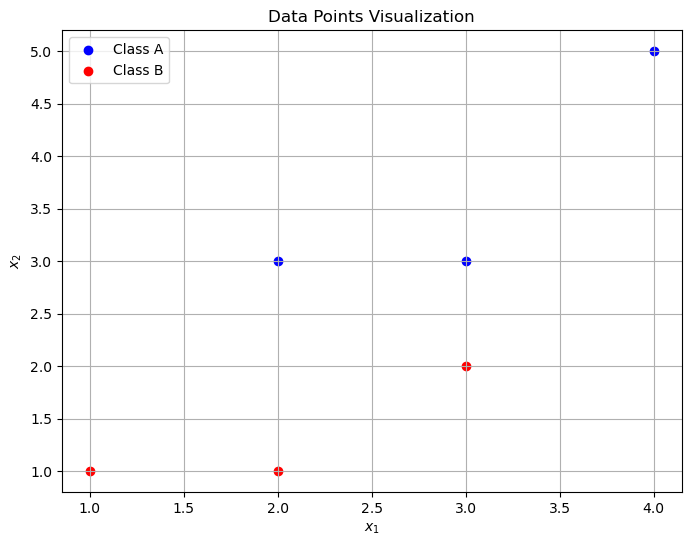

In [7]:
import matplotlib.pyplot as plt

# Data points for Class A and Class B
class_A = [(2, 3), (3, 3), (4, 5)]
class_B = [(1, 1), (2, 1), (3, 2)]

# Separate the data points into x and y coordinates
x_A, y_A = zip(*class_A)
x_B, y_B = zip(*class_B)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x_A, y_A, color='blue', label='Class A')
plt.scatter(x_B, y_B, color='red', label='Class B')

# Add labels, title, and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Data Points Visualization')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


The new point [3 4] is classified as Class A


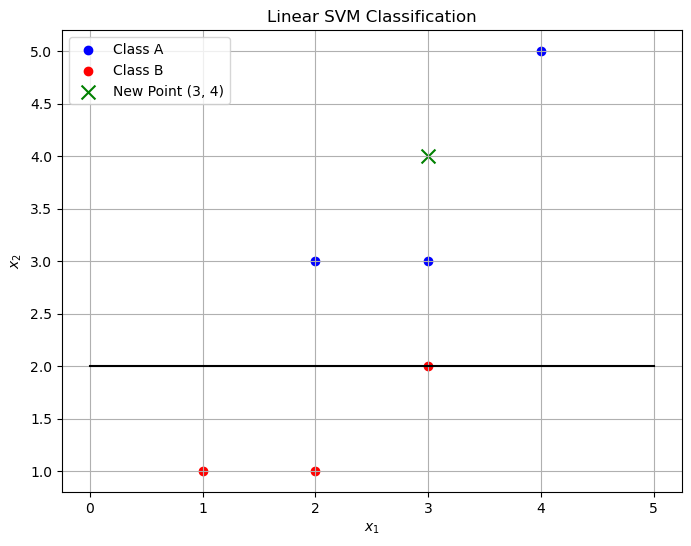

In [8]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Data points for Class A and Class B
class_A = [(2, 3), (3, 3), (4, 5)]
class_B = [(1, 1), (2, 1), (3, 2)]

# Combine the data points and create labels
X = np.array(class_A + class_B)
y = np.array([1] * len(class_A) + [0] * len(class_B))

# Create and train the SVM with a linear kernel
clf = SVC(kernel='linear')
clf.fit(X, y)

# Define the new data point to classify
new_point = np.array([[3, 4]])

# Classify the new data point
classification = clf.predict(new_point)
print(f'The new point {new_point[0]} is classified as Class {"A" if classification == 1 else "B"}')

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*class_A), color='blue', label='Class A')
plt.scatter(*zip(*class_B), color='red', label='Class B')
plt.scatter(new_point[:, 0], new_point[:, 1], color='green', label='New Point (3, 4)', marker='x', s=100)

# Plot decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Linear SVM Classification')
plt.legend()
plt.grid(True)
plt.show()
